# Estimating Resistivity of PowerCable for different different ageing

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the Resistivity data from the CSV file
Resitivity_data = pd.read_csv('ResistivityLOGforall4model.csv')

# Select relevant features and target variable for modeling
Resitivity_subdata = Resitivity_data.iloc[:, [0, 1, 2, 3, 10]]

# Split the data into features (X) and target variable (y)
X = Resitivity_subdata.iloc[:, :-1].values
y = Resitivity_subdata.iloc[:, -1].values

# Split the dataset into training and testing sets with a 30% test size and a random seed of 40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)


In [3]:
Resitivity_subdata.describe()

,Electric Field,Aging Temp,Testing Temp,Aging Days,Resistivity
count,117.000000,117.000000,117.000000,117.000000,117.000000
mean,15.000000,70.000000,60.000000,110.769231,27.279826
std,4.100042,7.878386,8.200084,88.790278,2.095442
min,10.000000,60.000000,50.000000,0.000000,22.905552
25%,10.000000,60.000000,50.000000,32.000000,26.228597
50%,15.000000,70.000000,60.000000,64.000000,27.445896
75%,20.000000,80.000000,70.000000,128.000000,28.627970
max,20.000000,80.000000,70.000000,256.000000,31.545042


In [4]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(81, 4) (36, 4) (81,) (36,)


In [21]:
# random forest model
from sklearn.ensemble import RandomForestRegressor
# instantion of the model
model=RandomForestRegressor(n_estimators =733,max_depth= 100,min_samples_split= 2, max_features='auto',bootstrap =True , random_state=30)

# fitting the model
RF_model = model.fit(X_train,y_train)

# Training model evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score, r2_score

# the training r_sq
print("The Training r-sq is %.2f :"% RF_model.score(X_train,y_train))

# predictions on the traning dataset
ytrain_pred=RF_model.predict(X_train)

# the MAE
print('The MAE is: %.2f'% mean_absolute_error(y_train,ytrain_pred))
# the MSE
print('The MSE is : %.2f'% mean_squared_error(y_train,ytrain_pred))
# the Rmse
import numpy as np
print("The RMSE is: %.2f"% np.sqrt(mean_squared_error(y_train,ytrain_pred)))
# the EVS
print("The EVS is: %.2f"% explained_variance_score(y_train,ytrain_pred))

The Training r-sq is 0.99 :
The MAE is: 0.12
The MSE is : 0.03
The RMSE is: 0.16
The EVS is: 0.99


In [22]:
# Prediction on the testing data
y_test_pred = RF_model.predict(X_test)

# Testing Coefficient of Determination (R-squared)
print('The testing R-squared is: %.2f' % r2_score(y_test, y_test_pred))
# Metrics
# Mean Absolute Error (MAE)
print('The MAE is: %.2f' % mean_absolute_error(y_test, y_test_pred))

# Mean Squared Error (MSE)
print('The MSE is: %.2f' % mean_squared_error(y_test, y_test_pred))

# Root Mean Squared Error (RMSE)
print("The RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Explained Variance Score (EVS)
print('The EVS is: %.2f' % explained_variance_score(y_test, y_test_pred))


The testing R-squared is: 0.91
The MAE is: 0.44
The MSE is: 0.32
The RMSE: 0.57
The EVS is: 0.91


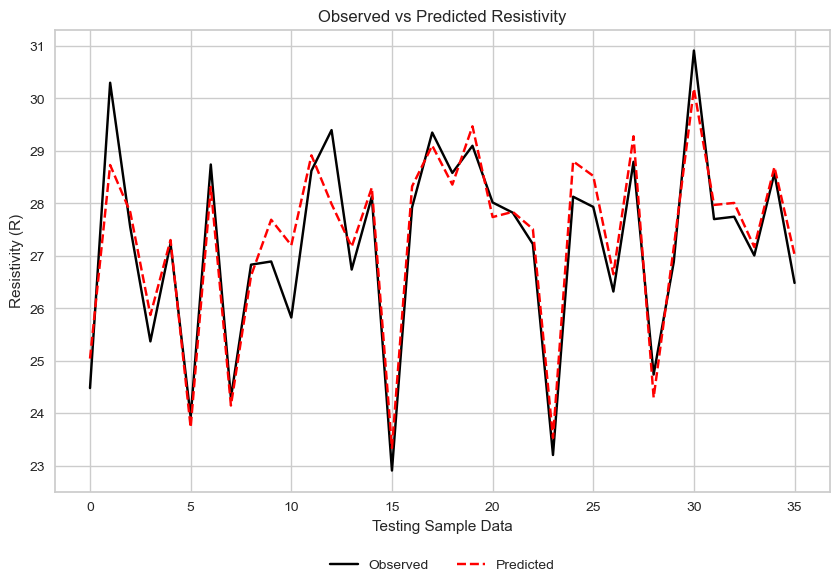

In [23]:
import matplotlib.pyplot as plt

# Plotting the observed and predicted data
plt.rcParams['figure.figsize'] = (10, 6)
x_axis = range(len(X_test))

# Plotting with specified boundaries and parameters
plt.plot(x_axis, y_test, label='Observed', color='black', linestyle='-')
plt.plot(x_axis, y_test_pred, label='Predicted', color='red', linestyle='--')

# Set plot labels and title
plt.ylabel('Resistivity (R)')
plt.xlabel('Testing Sample Data')
plt.title('Observed vs Predicted Resistivity')

# Add legend with proper formatting
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=2, frameon=False)

# Display the plot
plt.show()


In [24]:
# plottting the prediction errors and residuals using yellowbrick
# Anaconda/cmd prompt and type: pip install --user yellowbrick

In [25]:
#pip install --user yellowbrick

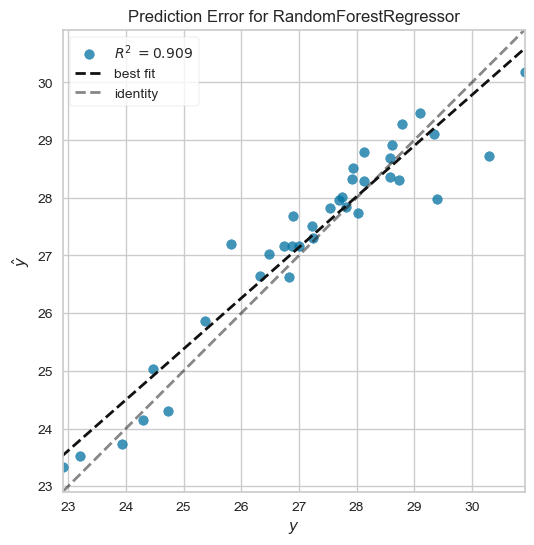

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [26]:
# plotting the prediciton errors
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(RF_model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

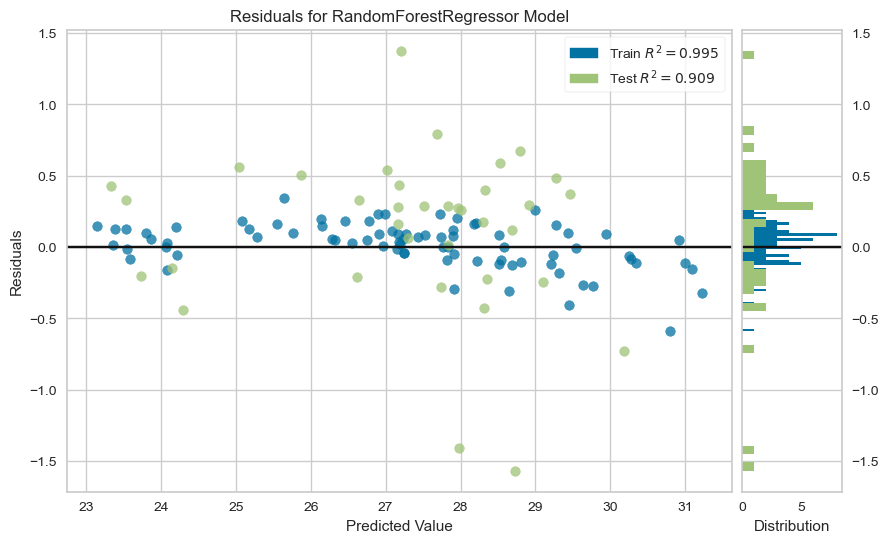

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [27]:
# plotting the residuals 
from yellowbrick.regressor import ResidualsPlot
visualizer =ResidualsPlot(RF_model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

In [28]:
# The k-fold CV
from sklearn.model_selection import cross_val_score
seed = 7
# Traning model CV
score_train=cross_val_score(RF_model, X_train, y_train, scoring = 'neg_mean_squared_error', cv=10)

In [29]:
# the  absolute Mean score
from numpy import absolute
print(absolute(np.mean(score_train)))

0.22041022551708123


In [30]:
# The tesing model CV
score_test =cross_val_score(RF_model,X_test,y_test,scoring = 'neg_mean_squared_error', cv=10)

In [31]:
score_test

array([-1.56073202, -7.12464462, -0.97288848, -0.39424258, -0.44048213,
       -0.1317293 , -0.06203624, -0.14965231, -6.95071845, -0.07058625])

In [32]:
print(absolute(np.mean(score_test)))

1.7857712384307647


In [33]:
# Random forst Feature Ranking
import pandas as pd
from sklearn.pipeline import Pipeline


In [34]:
f_list =list(["Electric Field","Aging Temp","Testing Temp","Aging Days"])
f_importance =pd.Series(RF_model.feature_importances_, index = f_list).sort_values(ascending = False)

In [35]:
print(f_importance)

Aging Temp        0.453035
Aging Days        0.317168
Testing Temp      0.118192
Electric Field    0.111605
dtype: float64


In [36]:
from sklearn import metrics
predictions = RF_model.predict(X_test)
errors = abs(predictions - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Model  Performance')
print('Accuracy = {:0.4f}%.'.format(accuracy))
print('Mean Absolute Error=  {:0.4f}'.format(np.mean(errors)))
print("R2 score={:0.4f}".format(r2_score(y_test, predictions)))
print("mean_squared_error={:0.4f}".format(mean_squared_error(y_test, predictions)))
print('Root Mean Squared Error = %.4f' % np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Model  Performance
Accuracy = 98.3859%.
Mean Absolute Error=  0.4419
R2 score=0.9085
mean_squared_error=0.3197
Root Mean Squared Error = 0.5654
